<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Anatomy-of-the-closed-loop-control-system" data-toc-modified-id="Anatomy-of-the-closed-loop-control-system-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Anatomy of the closed-loop control system</a></span></li><li><span><a href="#The-P(I)(D)-Controller" data-toc-modified-id="The-P(I)(D)-Controller-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The P(I)(D) Controller</a></span></li><li><span><a href="#Controller-Design:--P(I)(D)-Controller-Disciplined-Process" data-toc-modified-id="Controller-Design:--P(I)(D)-Controller-Disciplined-Process-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Controller Design:</em>  P(I)(D) Controller Disciplined Process</a></span></li><li><span><a href="#Controller-Design:-Proportional-(P)-Control" data-toc-modified-id="Controller-Design:-Proportional-(P)-Control-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Controller Design:</em> Proportional (P) Control</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li></ul></div>

# Challenge

Your friend has been patiently waiting for a design for an automatic dam control system.  They've provided you specifications for the design and now you are going to have to use your knowledge of transfer functions, including  steady state and transient behavior, to design a closed-loop controller to regulate the dam's turbine speed.

# Anatomy of the closed-loop control system

In your last notebook you were introduced to the "canonical" form of a system under feedback control, which is shown in the diagram below:

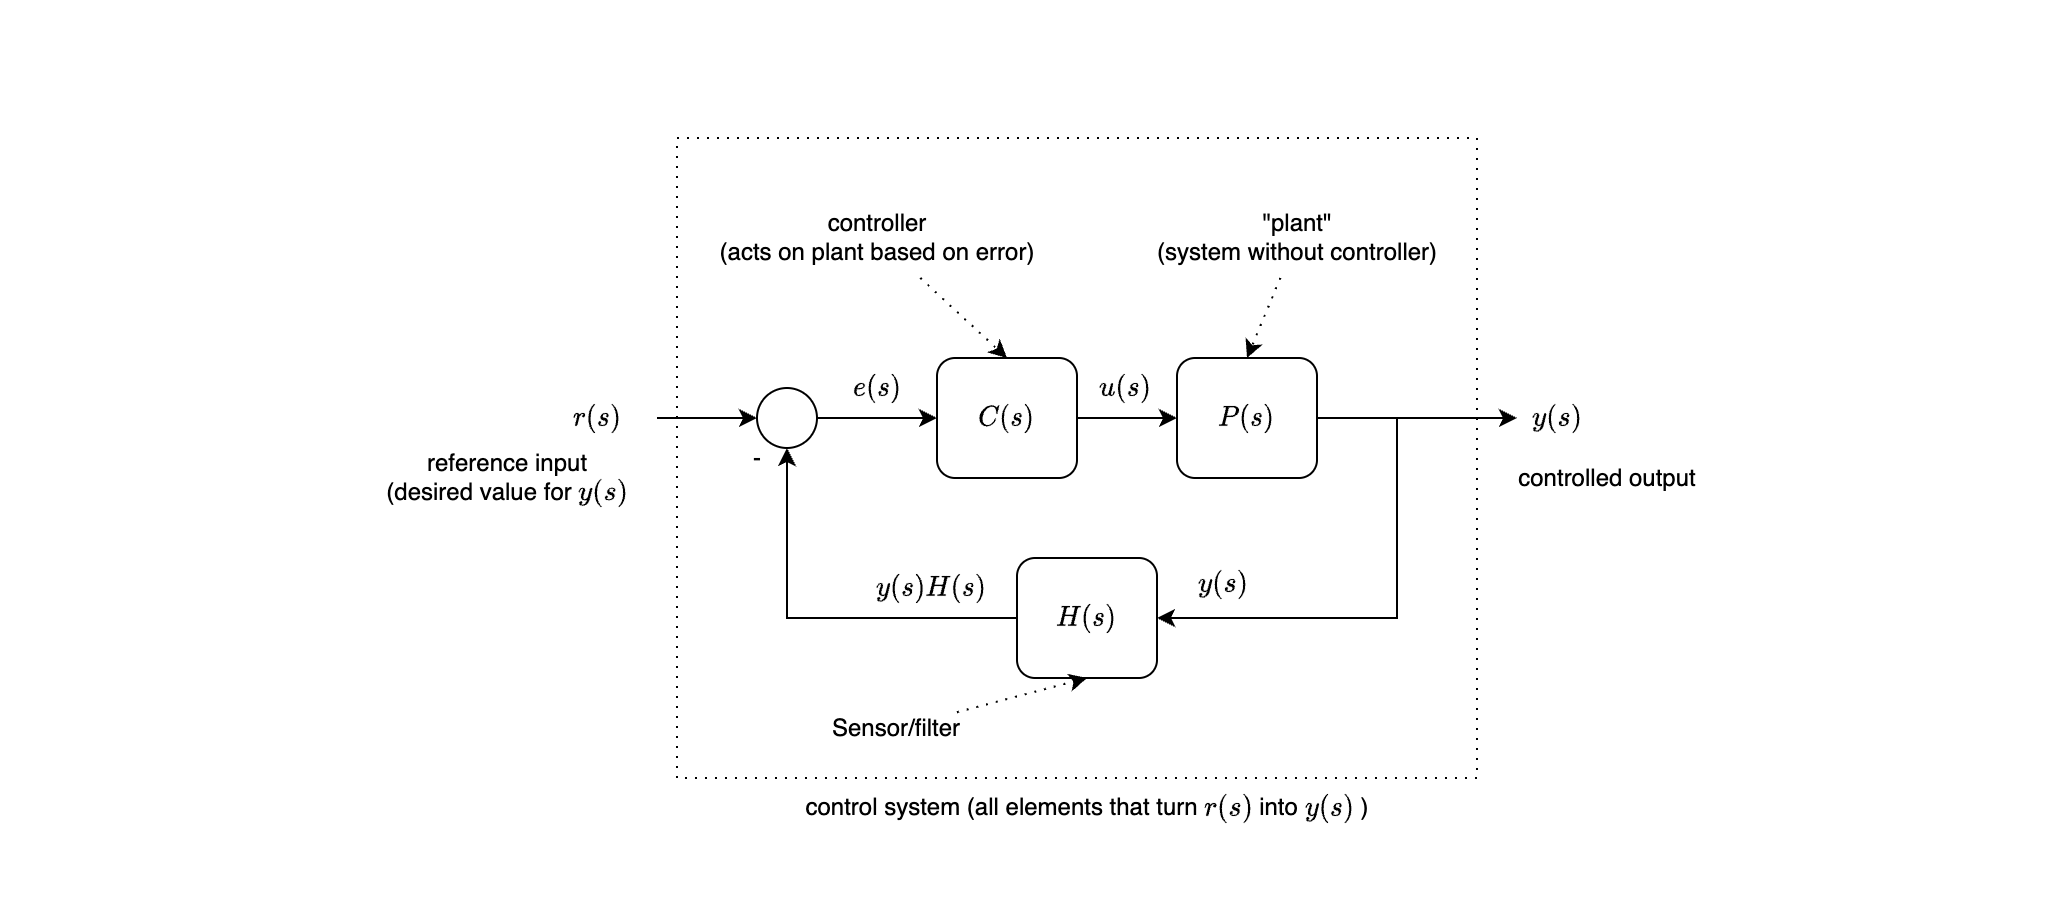

In the diagram above, as labeled, the system has the following key pieces:

* The **control system** is the entire system relating desired input to desired output. It includes the plant, controller, and any filters and/or sensors in the feedback path.
* The **plant** (labeled P(s) above) is the system, subsystem, or process that is controlled by our feedback controller.
* The **controlled output** (labeled y(s) above) is the output variable of the *plant* under control of the feedback controller. The plant's *input* u(s) is the controller's *output*, also called the *control signal* (see below).
* The **forward path** is the transmission path from the sum junction all the way to the controlled output.
* The **feedforward elements** are all control or compensation elements in the forward path. In the example above, this is just C(s), the **controller**.
* The **control signal** (labeled u(s) above) is the output signal of the feedforward elements (C(s)) that is applied to the plant P(s).
* The **feedback path** is the transmission path from the controlled output back to the sum junction.
* The **feedback elements** (labeled H(s)) relate the *actual* controlled output y(s) and the feedback signal read by the controller at the sum junction. Most often, H(s) represents a sensor that has some gain and filtering characteristics that apply in the act of measuring the system output.
* The **reference input** (labeled r(s)) is an external signal signal applied to the system. This is usually our "request" for the system to do something.
* The **primary feedback signal** (labeled y(s)H(s)) is a function of the controlled output y(s), transformed by the feedback elements H(s). This is the signal that is usually actually read by the controller.
* The **error signal** is the difference between the reference input and the primary feedback signal.
* **Negative feedback** implies that the sum junction *subtracts* r-yH. **Positive feedback** would imply that the sum junction adds r+yH. Negative feedback is nearly always used in feedback control.

We saw in the last reading that the canonical feedback control system has a closed-loop transfer function:

\begin{equation}
\frac{y(s)}{r(s)} = \frac{CP}{1+CPH}
\end{equation}

But what does this really mean? Note that the controller transfer function, *chosen by the engineer*, shows up in both the numerator and the denominator of the closed loop transfer function.  This means that the addition of the controller and feedback to the plant *changes the dynamics of the plant output*. This is precisely what we want, if our goal is to improve system performance. In simple terms, $C(s)$ is a transfer function that "makes decisions" about how hard to "push" the plant based on the difference between where the system *is* at any given instant ($y(s)H(s)$), and where the operator *wants the system to be* ($r(s)$). 

# The P(I)(D) Controller

In this course, we will focus on variants of the PID or "proportional-integral-derivative" controller, which has the following general transfer function:

\begin{equation}
C(s) = \frac{u(s)}{e(s)}= K_p + K_i\frac{1}{s} + K_ds
\end{equation}

The PID controller responds to the error proportionally (P-control), and/or the error's derivative proportionally (D-control), and/or the error's integral proportionally (I-control). PID control almost always includes a P-control element in the form of $K_p$, but often, $K_i$ and/or $K_d$ can be set to zero depending on the needs of the engineer and/or the plant. This week, we will focus on how variants of this general design work **for simple first and second order systems**. We'll use simplified examples and the so-called "direct method" of determining closed-loop system performance (see, for more information, chapters 3 and 4 of Schaum's Outline of Feedback and Control Systems or Sections 13.1-13.3 of Dynamic Modeling and Control of Engineering Systems) to build an understanding of how each type of controller works before diving into some more involved design tools that will allow us to apply these controllers effectively to more complex systems.

When synthesizing P(I)(D) controllers, we can have a number of different design goals. Some of these are listed below:

* Above all, we want to ensure system *stability,* defined as the closed loop system having eigenvalues with real parts strictly less than 0. We also generally want to know *how stable* a system is.. in other words, how close is it to being unstable?
* If the system is first order, we may want to change its time constant.
* If the system is second order, we may want to specify its natural frequency and/or damping ratio.
* If the system is second order, we may want to specify its [rise time, settling time, or percent overshoot](http://faculty.mercer.edu/jenkins_he/documents/2ndorderresponseMSD.pdf). 
* We may want the system to achieve a particular performance in tracking a step or ramp input to $r(s)$.
* We may want the system to achieve a particular performance in rejecting an impulse or step *disturbance input* (not shown above, but disturbances are usually modeled as appearing as an input to a sum junction in between $C(s)$ and the plant $G(s)$).
* We may want the system to achieve particular magnitude and/or phase performance when tracking a sinusoidal input of a known frequency on $r(s)$.

# *Controller Design:*  P(I)(D) Controller Disciplined Process


1. Beginning with a validated system model for the plant, determine the equations and/or system transfer function for each component of the system (e.g. $C(s)$,$P(s)$,$H(s)$, etc.)
2. Formulate a model of the total, controlled system by appropriately connecting the system elements using a block diagram. The canonical form above is usually, but not always, a good starting point. Construct a symbolic transfer function relating the control system's input to the control system's output using block diagram algebra. This is called the *closed loop transfer function*.
3. Determine the *design goals* for the control system. After adding the controller, what performance characteristics should the control system have? Consider both steady state and transient behavior in your selection of goals if needed. Use goals for transient characteristics (e.g. time constant, rise time, percent overshoot, damping ratio, settling time as appropriate) to construct a goal for the control system's eigenvalue(s), which will determine your goals for the closed loop transfer function's characteristic equation. use goals for steady state behavior to determine the goal for the control system's steady state gain.
4. Determine appropriate controller parameters  ($K_p$,$K_d$,$K_i$) by manipulating the characteristic equation and steady state gain for your closed loop transfer function to match your design goals. 

Of course, after following this design process, you should try to validate your design by implementing it on the real system and see if it performs as expected.

We will deal with how to handle most of these design goals in more detail as needed, but it is helpful to know where we are going. To begin our journey, let's take a closer look at so-called "P-control," which is a special case of PID control with $K_d$ and $K_i$ set to 0.

# *Controller Design:* Proportional (P) Control

Proportional control is the simplest form of the PID feedback control paradigm. This controller 'pushes' on the plant *proportionally* to the error between the reference input and the plant output. As the system gets closer to the desired value of the output, the controller pushes less and less hard.  You might think of this controller like a "spring" that drives the plant to the desired output. For a proportional controller, the controller transfer function is a constant $K_p$. Formally, we write:

\begin{equation}
\frac{u(s)}{e(s)}=C(s) = K_p
\end{equation}

**Knowing the units of your controller's gain(s) is extremely important**.  Often $e(s)$ and $u(s)$ will often have different units. This means that the value of $K_p$ will assume the units needed to make a dimensional analysis work out. 

For example, if $e(s)$ is a distance error measured in meters, and $u(s)$ is a voltage input to a motor measured in Volts, then the controller's proportional constant $k_p$ must have units of $\frac{V}{m}$. 

## Example

**Fixed Assumptions**

Consider a plant $P(s) = \frac{1}{s+1}$. Design a proportional controller to make this system track a step input, and achieve steady-state in less than 1 second. The system uses a sensor that measures the plant's output $y(s)$ perfectly with a gain of $1$. After designing your controller, find the maximum controller output $u(s)$ needed for a unit step input, and find the system's steady-state error between reference input and system output.
___

**Process**

To decipher the design goal, note that we often assume that [a first-order system reaches steady state in roughly 4-5 time constants](../W03A_Modeling_MathematicalTools/Week03A_Modeling_MathematicalTools.ipynb#Settling-Time). Therefore, we can say that we'd like our system to have a time constant of 0.2 seconds or less. 

Because the problem also states that the sensing in the system is 'perfect,' we can say that $H(s)=1$ as this means the output will feed back to the system without any modifications. 

We will chose a proportional controller to this system and use the canonical form of the closed loop transfer function developed from  [block diagram simplification](../W04B_Modeling_TransferFunctions_BlockDiagrams/W04B_TransferFunctions_BlockDiagrams.ipynb#Block-Diagram-Simplification-using-algebra).  Substituting the proprotional control law and our plant into this form of $\frac{y(s)}{r(s)}$ yields

\begin{equation}
\frac{y(s)}{r(s)} = \frac{K_p\frac{1}{s+1}}{1+K_p\frac{1}{s+1}}
\end{equation}

Clearing the fractions in the numerator and denominator by multiplying the transfer function by $\frac{s+1}{s+1}$ yields the final equation for the system's *closed loop transfer function*:

\begin{equation}
G_{cl}(s) = \frac{y(s)}{r(s)} = \frac{K_p}{s+1+K_p}
\end{equation}

Now, we have to determine what value of $K_p$ will allow us to reach our design goal of $\tau<0.2s$.  

Note that a first order system response [can be represented generically as $\frac{A}{s+a}$](../W04B_Modeling_TransferFunctions_BlockDiagrams/W04B_TransferFunctions_BlockDiagrams.ipynb#Example:-Laplace-Transform-solution-of-a-first-order-system-2.1).   Examining the denominator, we can use it to write the characteristic equation of the system and determine the root of the equation which is the system eigenvalue.

\begin{equation}
s+a=0, s=-a
\end{equation}

The [time constant](../W03A_Modeling_MathematicalTools/Week03A_Modeling_MathematicalTools.ipynb#Time-Constant) can be determined from $\tau=\frac{1}{a}$, where $-a$ represents the system eigenvalue.  

In the case of our controller, we can meet the design constraints by having a time constant of 0.2 seconds so we want a system with $-a=-5$. Solving the system's closed-loop characteristic equation means solving:

\begin{equation}
s+1+K_p=0
\end{equation}

This yields a system eigenvalue $-a=-1-K_p$, so for our example, we know that $K_p=4$ will satisfy our design requirement. Let's simulate the closed-loop system's response to a step input on $r(s)$.

In [ ]:
pkg load control
s = tf('s');
t = 0:.001:1.5;%go a little past where we said the system should be at steady state
P1 = 1/(s+1);
Kp = 9;
Gcl = P1*Kp/(1+P1*Kp);

[ysim,tsim]=step(Gcl,t);%simulate without plotting so we store variables.

figure
plot(tsim,ysim,'k')
xlabel('Time (s)')
ylabel('System Output (?)')

As you can see, our controlled system does a pretty good job of getting to steady-state by 1 second, but there's a problem... one of our design goals was for the system to track the reference input $r(s)$. Because $r(s)$ was a unit step, we might have expected that our system would reach a steady-state value of 1, but it doesn't! To show how the system's error progresses over time, we can simply take the constant value of $r(s)$ (which in this case was just 1) and subtract the system's output under closed loop control from $r(s)$, since the error signal $e(s)=r(s)-y(s)H(s)$. Alternatively, we could use some block diagram algebra to find the transfer function $\frac{e(s)}{r(s)}$ directly. I'll leave the details of this to you to try (highly recommended for practice!), but if we do the reduction, we find that the transfer function $\frac{e(s)}{r(s)}$ for our controlled system is:

\begin{equation}
\frac{e(s)}{r(s)} = \frac{s+1}{s+5}
\end{equation}

Applying the [final value theorem](../W04B_Modeling_TransferFunctions_BlockDiagrams/W04B_TransferFunctions_BlockDiagrams.ipynb#The-Final-Value-Theorem:-Find-a-model's-steady-state,-final-value) can get us an answer about how much steady-state error we will have in response to a unit step input:

\begin{equation}
\lim_{t\rightarrow \infty} e(t) = \lim_{s\rightarrow 0} s e(s) = \lim_{s\rightarrow 0} s\frac{1}{s}\frac{s+1}{s+5} = 0.2
\end{equation}

So it appears that our controller, while it does meet the requirement to reach steady state within 1 second, doesn't do a great job of tracking our reference input! Unless we're ok with $20\%$ tracking error even for a simple step input, we'll need something else to do better. Let's plot the system's error response using MATLAB/Octave:

In [ ]:

%create our TF from e to y
G_e_y = (s+1)/(s+50);

%now see how it responds to a step input

[yey,tey] = step(G_e_y,t);

figure
plot(t,yey,'k')
xlabel('Time (s)')
ylabel('tracking error')

It appears that the error acts as we'd expect. The error signal could also have been found by simply subtracting $y$ from $r$ given our original step response. To see how much system input would have been required to achieve this step response from our controller, we need to plot the step response of the transfer function $\frac{u(s)}{r(s)}$, or in this case, we can simply multiply $e(s)$ by $K_p$. This implies that the maximum controller output needed for the unit step is $4$ "units." These units could be voltage if our controller drove an electric motor, pump, solenoid, or similar electromechanical device, for instance.